In [48]:
import numpy as np
from astropy.io import fits
from pathlib import Path

imlist = []
jd = []
for i in range(1237):
    fn = Path(Path.cwd()) / f"data/TESS/HAT-P-11/{i}.fits"
    imlist.append(fits.getdata(fn))
    jd.append(fits.getheader(fn)["btjd"])
imlist = np.array(imlist)
jd = np.array(jd)

In [49]:
jd

array([1683.36712646, 1683.38800049, 1683.40881348, ..., 1710.13824463,
       1710.15905762, 1710.17987061])

In [50]:
jd.shape

(1237,)

In [51]:
imlist.shape

(1237, 20, 20)

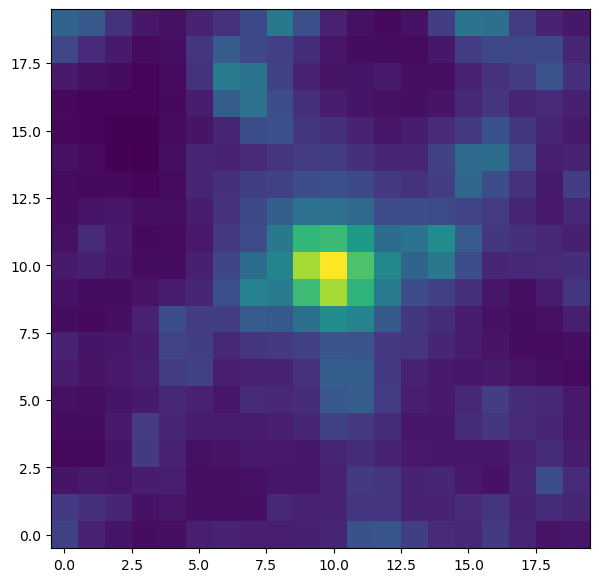

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.log10(imlist[0]), origin="lower")

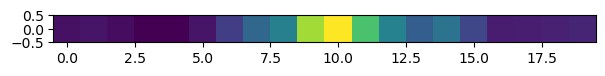

In [54]:
fig, ax = plt.subplots(figsize=(7, 1))
pixels = np.log10(imlist[0])[10]
ax.imshow(np.array([pixels]), origin="lower")

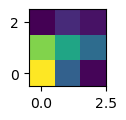

In [55]:
# Exercise 6.1.1
fig, ax = plt.subplots(figsize=(1, 1))
images = np.log10(imlist[2:10])
# First image, first 3 rows and cols
ax.imshow(images[0, 0:3, 0:3], origin="lower")

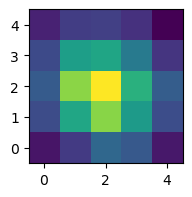

In [56]:
# Exercise 6.1.2
fig, ax = plt.subplots(figsize=(2, 2))
images = np.log10(imlist[1::2])
# First image, central 5 pixels
ax.imshow(images[0, 8:13, 8:13], origin="lower")